# <font color=green> **AULA PRÁTICA 2**
-----

## Objetivo:
Apresentar diferentes exemplos de Dataset com diferentes operações que PODEM ser feitas na etapa de análise exploratória dos dados e pré-processamento.


## Tópicos:
1.   Caso 1: Iris Dataset
2.   Caso 2: Titanic Dataset
  






----
# 1 - Caso 1: Iris Dataset


"Iris Flower" é um dataset compilado por Ronald Fisher, em 1930. Os dados contém 3 diferentes classes de flores (Iris Versicolor, Iris Setosa e Iris Virginica).

<br>

* **Informações contidas nesse dataframe:**

  * Sepal length em cm
  * Sepal width em cm
  * Petal length em cm
  * Petal width em cm
  * Tipo:
    * Setosa
    * Versicolour
    * Virginica
  
<br>

* **Dataset está disponível em:**

https://archive.ics.uci.edu/ml/datasets/iris

<br>


* **Objetivo do dataset:**

Um botânico consegue diferenciar os tipos de flores. Você, como cientista de dados, e a partir das variáveis fornecidas, consegue determinar qual o tipo de flor?




## Importando pacotes e lendo arquivo externo

In [105]:
# Importando pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# lendo o arquivo
df_iris = pd.read_table('/content/drive/My Drive/2020/Matéria Data Science/aula pratica 2/1_iris.txt',names = ['sepal length','sepal width','petal length','petal width', 'Class'], sep = ',')

## Características gerais do dataframe

In [107]:
# Dimensão
df_iris.shape             # 150 linhas, 5 colunas

(150, 5)

In [108]:
# Informação geral do dataset
df_iris.info()            # podemos observar que não há dados ausentes (Non-Null Count)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
# tipos de variáveis
df_iris.dtypes               # todas são numéricas contínuas, tirando "Class" que é categórica

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
Class            object
dtype: object

In [110]:
# nome das variáveis
df_iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'Class'], dtype='object')

In [111]:
# classes diferentes de plantas
df_iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [112]:
# número de elementos por classe
df_iris['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

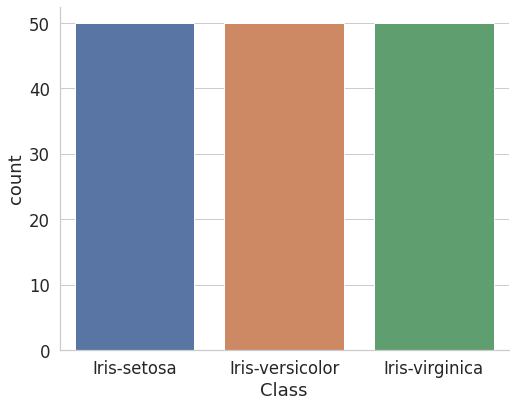

In [113]:
# gráfico contando o número de elementos que existem em cada classe
sns.set(font_scale=1.5, style = "whitegrid")
sns.catplot(x="Class", kind = "count", data = df_iris, height = 6, aspect = 1.2)

<font color=red> A partir do gráfico, podemos perceber que as classes são balanceadas, pois todas contém o mesmo número de registros (50 cada).

In [114]:
# porcentagem de cada classe:
round(100*df_iris['Class'].value_counts()/len(df_iris),2)

Iris-setosa        33.33
Iris-virginica     33.33
Iris-versicolor    33.33
Name: Class, dtype: float64

## Verificar existência de dados ausentes

In [115]:
# contar quantos dados ausentes existem
df_iris.apply(lambda x: sum(x.isnull()),axis=0)  

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

## Resumo estatístico dos dados

In [116]:
# resumo estatístico
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 432x360 with 0 Axes>

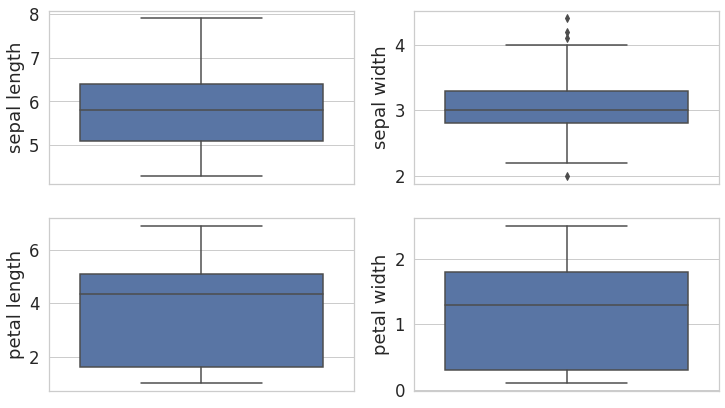

In [117]:
# boxplot das variáveis 
plt.figure(figsize=(6,5))
fig, axs = plt.subplots(2,2, figsize=(12,7))
fn = ["sepal length", "sepal width", "petal length", "petal width"]
sns.boxplot(y = 'sepal length', data = df_iris, ax = axs[0,0])
sns.boxplot(y = 'sepal width', data = df_iris, ax = axs[0,1])
sns.boxplot(y = 'petal length', data = df_iris, ax = axs[1,0])
sns.boxplot(y = 'petal width', data = df_iris, ax = axs[1,1])

São 3 classes, 3 famílias diferentes. Não seria mais interessante fazer um boxplot para cada classe?

<Figure size 432x360 with 0 Axes>

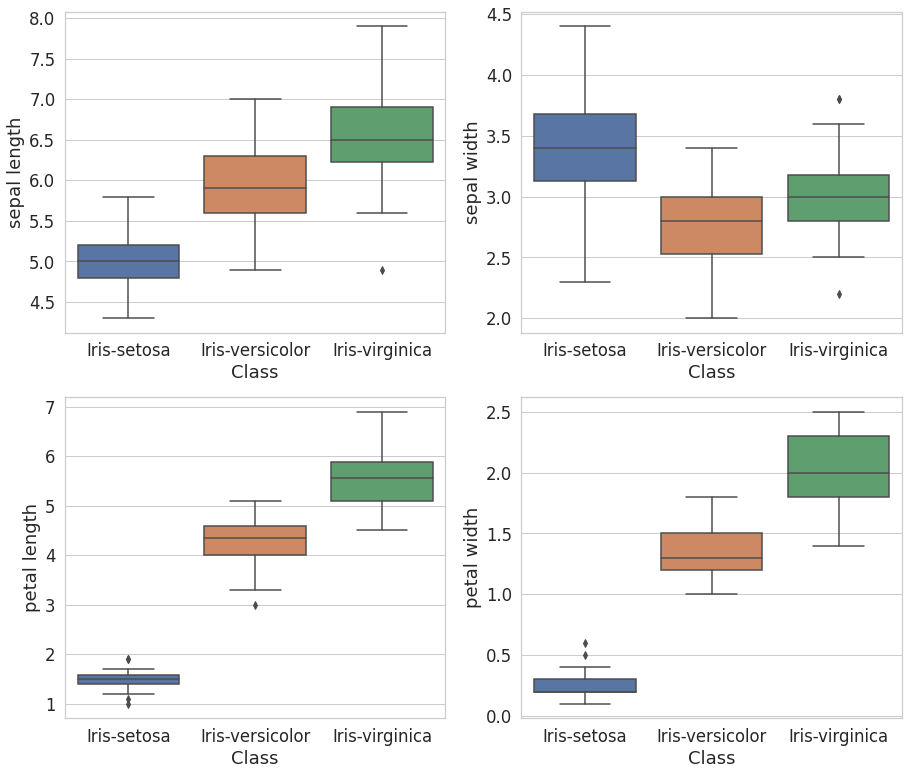

In [118]:
# boxplot das variáveis por classe
plt.figure(figsize=(6,5))
fig, axs = plt.subplots(2,2, figsize=(15,13))
fn = ["sepal length", "sepal width", "petal length", "petal width"]
sns.boxplot(x = 'Class', y = 'sepal length', data = df_iris, ax = axs[0,0])
sns.boxplot(x = 'Class', y = 'sepal width', data = df_iris, ax = axs[0,1])
sns.boxplot(x = 'Class', y = 'petal length', data = df_iris, ax = axs[1,0])
sns.boxplot(x = 'Class', y = 'petal width', data = df_iris, ax = axs[1,1])

<Figure size 432x360 with 0 Axes>

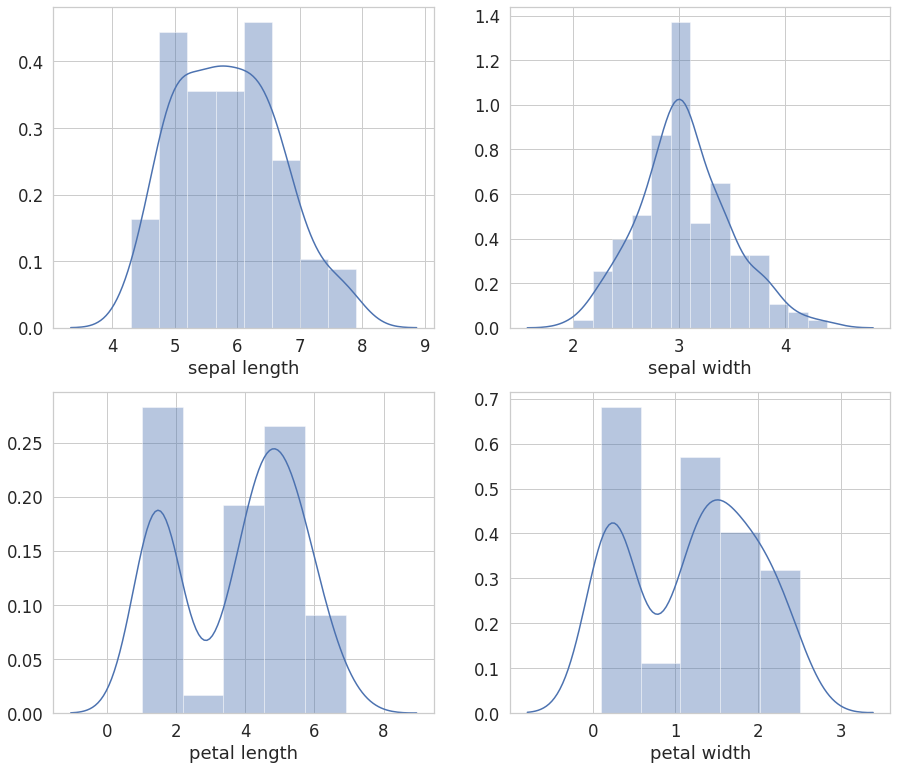

In [119]:
# Histogramas - sem considerar classes
plt.figure(figsize=(6,5))
fig, axs = plt.subplots(2,2, figsize=(15,13))
fn = ["sepal length", "sepal width", "petal length", "petal width"]
sns.distplot(df_iris['sepal length'], ax = axs[0,0]) 
sns.distplot(df_iris['sepal width'], ax = axs[0,1])
sns.distplot(df_iris['petal length'], ax = axs[1,0])
sns.distplot(df_iris['petal width'], ax = axs[1,1])

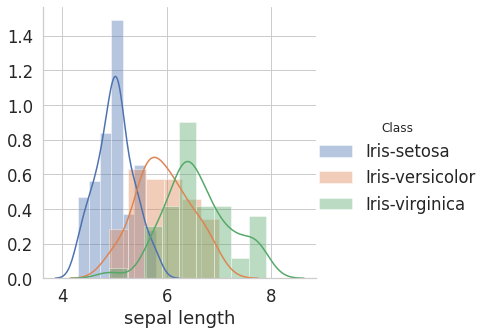

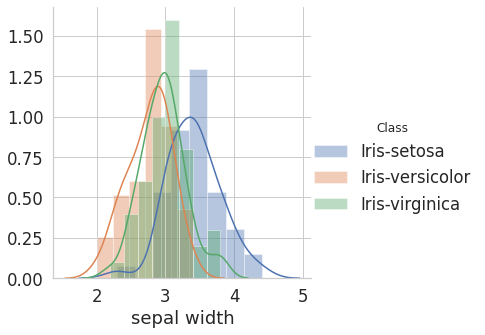

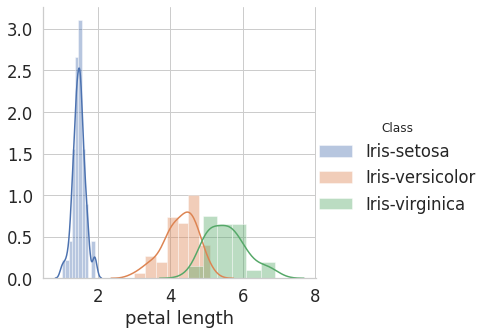

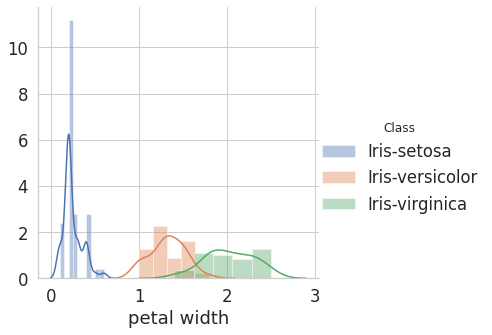

In [120]:
# Histogramas considerando as classes
for ojha, feature in enumerate(list(df_iris.columns)[:-1]):
    fg = sns.FacetGrid(df_iris, hue='Class', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

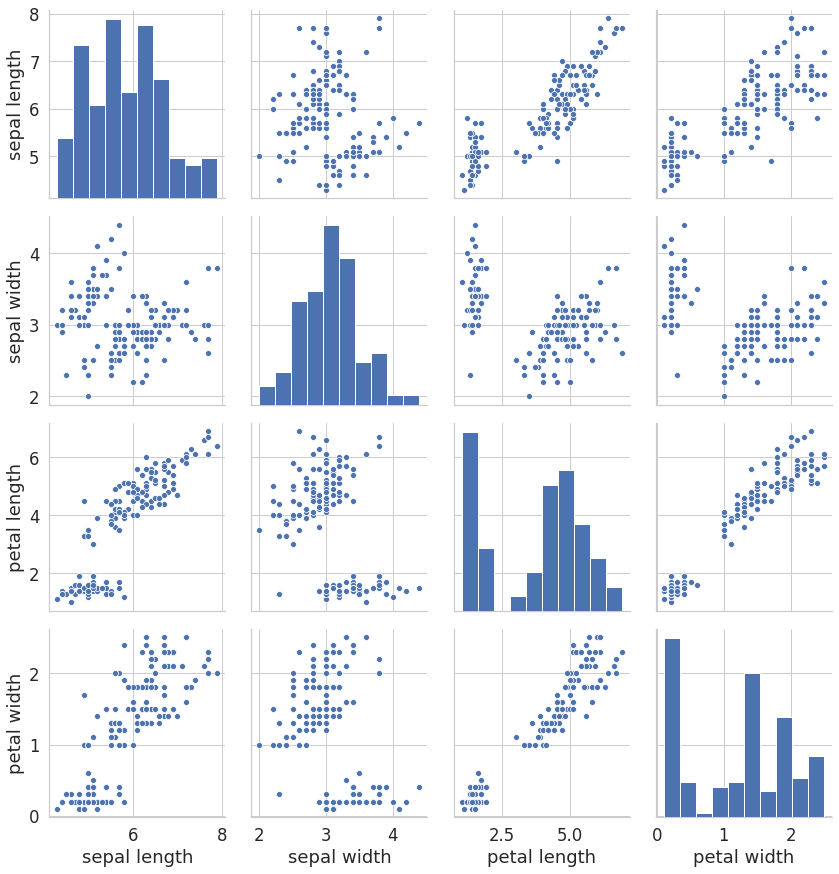

In [121]:
# Pair Plot sem considerar as classes
sns.set_style("whitegrid");
sns.pairplot(df_iris,height=3);
plt.show()

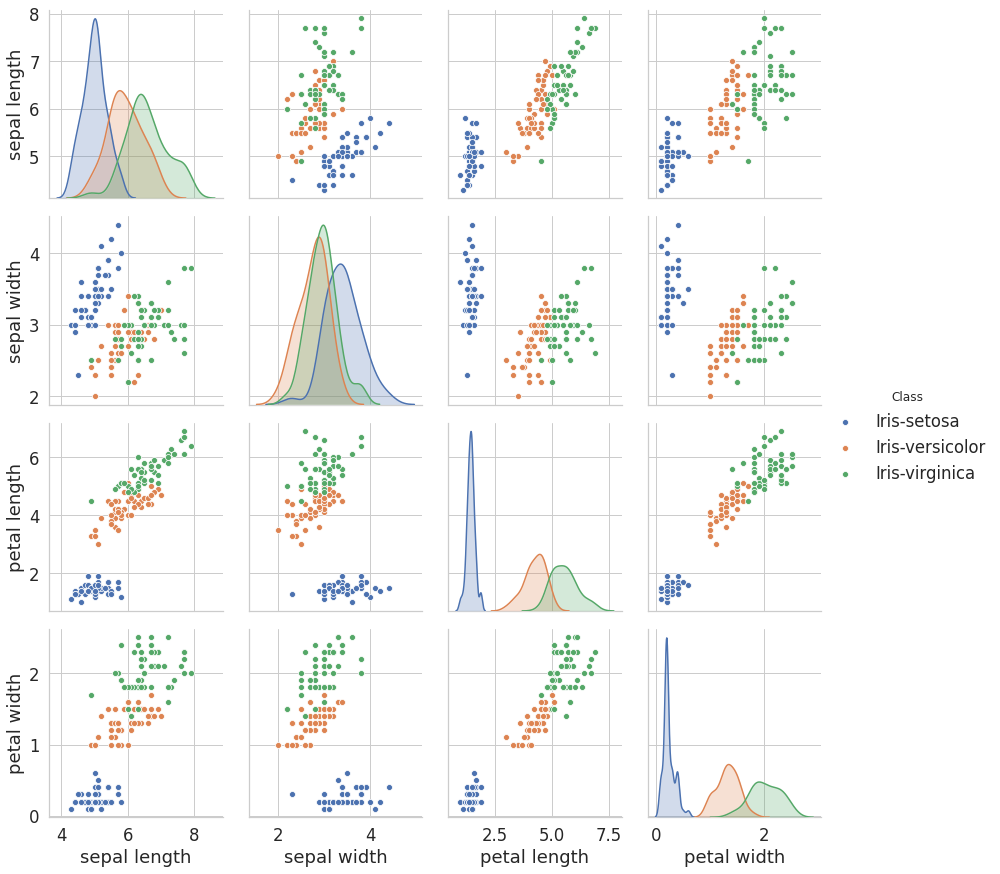

In [122]:
# Pair Plot considerando as classes
sns.set_style("whitegrid");
sns.pairplot(df_iris, hue="Class", height=3);
plt.show()

## Análise de correlação das variáveis

In [123]:
# Matriz de correlação
df_corr = df_iris.corr()
df_corr

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


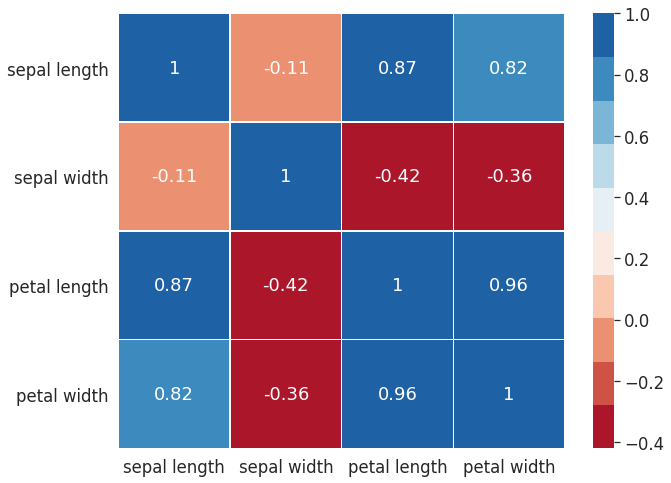

In [124]:
plt.figure(figsize=(10,8))   # tamanho da figura
cmap1 = sns.color_palette("RdBu", 10)
g = sns.heatmap(df_corr,  annot = True,cmap=cmap1, linecolor='white', xticklabels = df_corr.columns, linewidths=0.5, yticklabels = df_corr.columns)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g

In [125]:
# Será que a correlação muda de classe para classe? Vamos criar 3 datasets ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica') e calcular a matriz de correlação para cada 1
df_setosa = df_iris.loc[df_iris['Class'] == 'Iris-setosa',:]
df_versicolor = df_iris.loc[df_iris['Class'] == 'Iris-versicolor',:]
df_virginica = df_iris.loc[df_iris['Class'] == 'Iris-virginica',:]

In [126]:
# Correlação para cada classe
print('Setosa:')
print(round(df_setosa.corr(),2))

print('Versicolor:')
print(round(df_versicolor.corr(),2))

print('Virginica:')
print(round(df_virginica.corr(),2))


Setosa:
              sepal length  sepal width  petal length  petal width
sepal length          1.00         0.75          0.26         0.28
sepal width           0.75         1.00          0.18         0.28
petal length          0.26         0.18          1.00         0.31
petal width           0.28         0.28          0.31         1.00
Versicolor:
              sepal length  sepal width  petal length  petal width
sepal length          1.00         0.53          0.75         0.55
sepal width           0.53         1.00          0.56         0.66
petal length          0.75         0.56          1.00         0.79
petal width           0.55         0.66          0.79         1.00
Virginica:
              sepal length  sepal width  petal length  petal width
sepal length          1.00         0.46          0.86         0.28
sepal width           0.46         1.00          0.40         0.54
petal length          0.86         0.40          1.00         0.32
petal width           0.28     

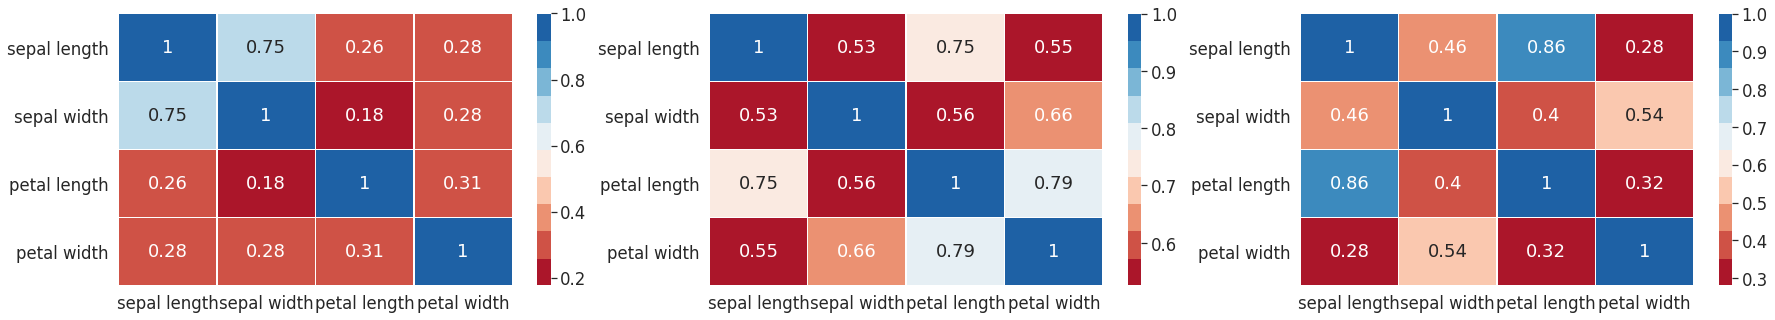

In [127]:
# Correlação para cada classe
fig, axs = plt.subplots(1,3, figsize=(30,5))
sns.heatmap(df_setosa.corr(),  annot = True,cmap=cmap1, linecolor='white', linewidths=0.5, ax = axs[0])
sns.heatmap(df_versicolor.corr(),  annot = True,cmap=cmap1, linecolor='white',  linewidths=0.5, ax = axs[1])
sns.heatmap(df_virginica.corr(),  annot = True,cmap=cmap1, linecolor='white', linewidths=0.5, ax = axs[2])

## Verificando presença de linhas duplicadas

In [129]:
# Verificando se há Linhas Duplicadas
duplicadas = df_iris.duplicated(keep = False)  # checa se tem linhas duplicadas, e retorna boleano com True ou False
print(duplicadas.any())     # tem registros repetidos? True ou False   
print(df_iris[duplicadas])       # Retorna as linhas que estão duplicadas

True
     sepal length  sepal width  petal length  petal width           Class
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


In [130]:
df_iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [131]:
# Remover linhas duplicadas
df_iris.drop_duplicates(inplace = True)
df_iris.shape

(147, 5)

-------
# 2 - Titanic Dataset

"Titanic Dataset" é o conjunto de dados disponibilizados em uma das competições mais famosas de ML, e é referente ao Naufrágio do Titanic. 

<br>

* **Informações contidas nesse dataframe:**

  * **PassengerID:** Número de identificação do passageiro
  * **Survived:** Indica se o passageiro sobreviveu ao desastre. É dado 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu.
  * **Pclass:**  Classe na qual o passageiro viajou. 1 - primeira classe, 2 - segunda classe, 3 - terceira classe.
  * **Name:** Nome do passageiro
  * **Sex:** Sexo do passageiro
  * **Age:** Idade do passageiro em anos
  * **SibSp:** Quantidade de irmãos e cônjuges a bordo
  * **Parch:** Quantidade de pais e filhos a bordo
  * **Ticket:** Número da passagem
  * **Fare:** Preço da passagem
  * **Cabin:** Número da cabine do passageiro
  * **Embarked:** O ponto no qual o passageiro embarcou. "C" para Cherbourg, "Q" para Queenstown e "S" para Southampton.
  
<br>

* **Dataset está disponível em:**

Os dados do titanic Dataset estão em: 
https://www.kaggle.com/c/titanic/data?select=train.csv

O dataset é apenas o train.csv

<br>


* **Objetivo do dataset:**

Queremos prever quais os passageiros sobreviveram ao desastre, a partir de diferentes variáveis (X) disponibilizados. 



## Importando pacotes e dataset 

In [132]:
# Importando pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# lendo o arquivo
df_titanic = pd.read_csv('/content/drive/My Drive/2020/Matéria Data Science/aula pratica 2/2_Titanic.csv', sep = ',')

In [134]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Características gerais do dataframe

In [135]:
# Informação geral do dataset
df_titanic.info()            # podemos observar que não há dados ausentes (Non-Null Count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font color="red"> 
A partir da info, podemos notar que tem dados ausentes em "Age" e "Cabin", pois o número de registros é inferior ao total

In [136]:
# tipos de variáveis
df_titanic.dtypes               

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<font color="red"> 
* Variáveis categóricas: Name, Sex, Ticket, Cabin, Embarked.
* Variáveis Inteiras: PassengerID, Survived, Pclass, SibSp, Parch
* Variáveis contínuas: Age e Fare
* Podemos talvez remover PassengerId pois não irá acrescentar informações adicionais para o problema, e precisamos transformar a variável Sex em número.
</font>

A variável "Survived" é nosso Target (variável Y). Ela indica se a pessoa sobrevive (1) ou não sobrevive (0). Assim, vamos analisa-la

In [137]:
# quantidade de valores da variável Survived
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [138]:
# porcentagem de cada classe:
round(100*df_titanic['Survived'].value_counts()/len(df_titanic),2)

0    61.62
1    38.38
Name: Survived, dtype: float64

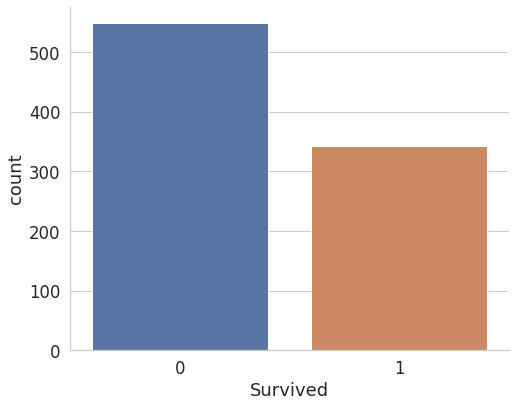

In [139]:
# gráfico contando o número de elementos que existem em cada classe
sns.set(font_scale=1.5, style = "whitegrid")
sns.catplot(x="Survived", kind = "count", data = df_titanic, height = 6, aspect = 1.2)

<font color=red> A partir do gráfico, podemos perceber que as classes são **DESBALANCEADAS**, pois a classe não sobreviveu (0) é superior a sobreviveu (1).
Quanto maior essa diferença entre as classes, mais desbalanceado o problema fica, e mais cuidado devemos tomar nas previsões.

In [140]:
# Resumo estatístico geral dos dados
round(df_titanic.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [141]:
df_titanic.describe().T   # se preferir na outra direção, apenas calcular a transposta .T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<font color="red"> Pelo resumo estatístico, podemos notar vários pontos
* PassagerId parece ser irrelevante, é apenas o nosso indice, não irá trazer informações importantes.
* A variável Pclass merece ser estudada, a mediana é 3 e está coincindo com o Q75% e o valor máximo. Temos então uma distribuição assimétrica. A quantidade de valores da classe 3 é superior que as demais.
* As idades não estão na forma inteira, mas a princípio não parece ter problema. Um bebê pode ter menos de 1 ano. Mas notar que contém dados ausentes.
* Notar a variável Fare. A média da taxa é 32, mas tem uma taxa que está em 512.33!!! Está completamente destoante dos demais.
</font>

In [142]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Por questões de simplificações, vamos remover "Name", "Ticket", "Embarked".

<br>

**OBS1:** "Cabin" poderia ser removido também, mas quero mostrar algo desta variável que pode ser útil.

<br>

**OBS2:** Em análises mais densas (como uma competição), essas variáveis poderiam ser exploradas.
Por exemplo, tem Mr.,Mrs., Miss, no *Name*. A partir dessas informações poderíamos identificar informações como casadas e solteiras. Será que teria relação com as pessoas que sobreviveram?
Há padrão nos tickets? E o tipo de cabine e o local que a pessoa embarcou. Será que daria para descobrir qual local era mais rico, de acordo com o valor da tarifa do ticket e a quantidade de pessoas de cada lugar?
Você pode fazer o que quiser com seus dados e fazer a análise que quiser/puder. O limite de opções para se trabalhar com dados é infinito.


<font color="green"> Próximos passos
* Variáveis PassengerId, Name, Ticket serão removidas 
* Precisamos lidar com valores ausentes
* Precisamos analisar a presença de outliers
* SibSp é o númmero de irmãos e Parch é a quantidade de pais e filhos a bordo. Podemos somar as duas colunas e transformar em uma só referente a familiares a bordo
* Precisamos analisar as variáveis
</font>

## Removendo variáveis

In [143]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
df_titanic.drop(['PassengerId', 'Name', 'Ticket'],axis = 1, inplace = True)

In [146]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Valores ausentes

In [147]:
# contar quantos dados ausentes existem
df_titanic.apply(lambda x: sum(x.isnull()),axis=0)  

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

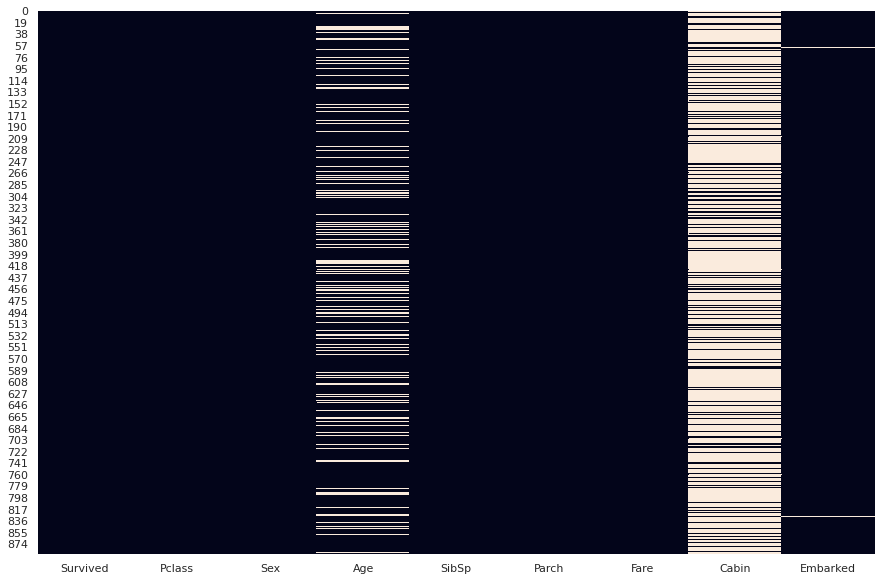

In [148]:
# Vendo dos valores ausentes visualmente
sns.set(rc={'figure.figsize':(15, 10)})  
sns.heatmap(df_titanic.isnull(), cbar=False)            # gráfico que mostra a quantidade de dados ausentes por coluna

In [149]:
# quantidade de valores do dataframe 
df_titanic.shape

(891, 9)

In [151]:
# quantidade de valores da variavel Cabin: 687. Porcentagem
round(100* 687/891,2)

77.1

<font color="red"> Notar que quase todos os registros da variável CABIN são valores ausentes. Por isso, vamos remover a variável Cabin.

In [152]:
df_titanic.drop(['Cabin'], axis = 1, inplace = True)

In [153]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<font color="green"> Temos alguns registros ausentes em Age. Será que podemos de alguma forma inserir registros nessa parte faltante?

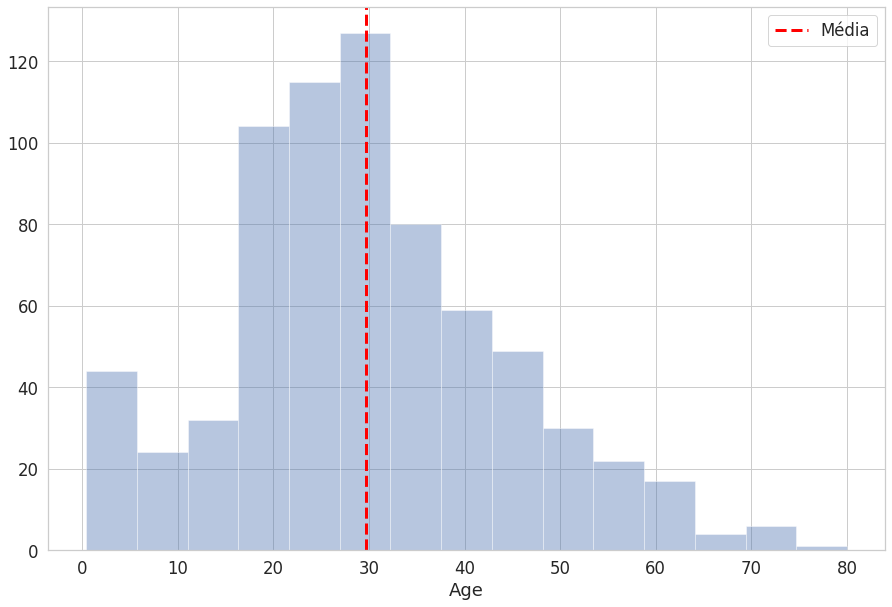

In [154]:
### Distribuição da idade dos passageiros retirando os dados faltantes
sns.set(font_scale=1.5, style = "whitegrid")
sns.distplot(df_titanic["Age"].dropna(),kde= False, bins=15)        # histograma das idades das pessoas embarcadas
plt.axvline(df_titanic["Age"].mean(), color='red', linestyle='dashed', linewidth=3, label = 'Média')         # A linha que indica a média das idades
plt.legend()

Podemos remover dados ausentes de diferentes formas.
* Uma delas é remover toda as linhas que tem idade com dado ausente. Isso removeria 177 dos 891 registros disponíveis. - muito ruim, muita perda de dados
* Outra sugestão seria remover a coluna Idade inteiro. Mas parece que idade tem uma influência nos sobreviventes ou não. Pode não ser uma boa ideia
* Podemos substituir pela média das idades (30 pelo gráfico).
* Podemos fazer de uma forma mais inteligente, podemos ver se tem diferença de idade, entre as diferentes variáveis categóricas que temos.

### Substituindo pela média

OBS: Vou criar um novo dataframe só para mostrar como poderíamos fazer, mas não irei utilizar nesta análise

In [155]:
df_versao2 = df_titanic.copy()         # fazer uma cópia do dataframe original
df_versao2['Age'] = df_versao2['Age'].fillna(df_versao2['Age'].mean())          # na coluna 'Age' iremos aplicar a função fillna(média da coluna age)

In [156]:
df_versao2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Verificar diferença entre idade e variáveis categóricas


In [157]:
df_titanic.head()    # variáveis categóricas: Survived, Pclass, Sex, Embarked

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


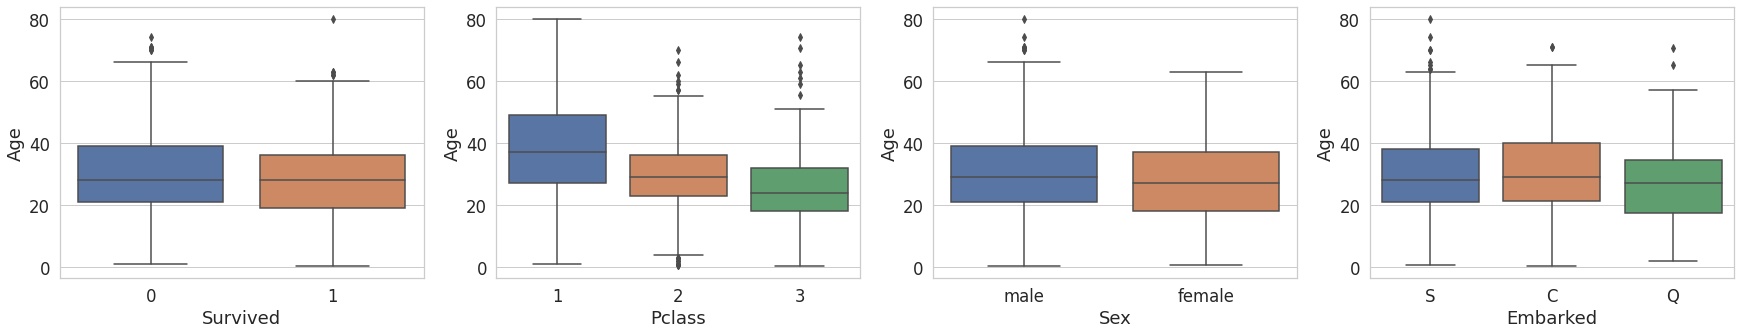

In [158]:
# Boxplot relacionado a idade as classes das variáveis categóricas
fig, axs = plt.subplots(1,4, figsize=(30,5))                                            # forma de fazer subplots - 1 linha e 4 colunas; o tamanho da figura é 30 de largura e 5 de altura
sns.boxplot(x = "Survived", y = "Age", data = df_titanic, ax = axs[0])                  # ax indica a posição da figura (0 - figura 1, 1 - figura 2,...)
sns.boxplot(x = "Pclass", y = "Age", data = df_titanic, ax = axs[1])
sns.boxplot(x = "Sex", y = "Age", data = df_titanic, ax = axs[2])
sns.boxplot(x = "Embarked", y = "Age", data = df_titanic, ax = axs[3])

<font color="green"> A partir dos boxplots, podemos perceber que parece ter maior diferença de idade de acordo com a variável Pclass (a classe que o indivíduo estava).
Então iremos fazer uma função que retorne a idade da pessoa, de acordo com a classe que ela pertence.


In [159]:
media_classe1 = df_titanic.loc[df_titanic['Pclass'] == 1, 'Age'].mean()         # média da idade na classe 1
media_classe2 = df_titanic.loc[df_titanic['Pclass'] == 2, 'Age'].mean()         # média da idade na classe 2
media_classe3 = df_titanic.loc[df_titanic['Pclass'] == 3, 'Age'].mean()         # média da idade na classe 3
print(media_classe1,media_classe2,media_classe3)

38.233440860215055 29.87763005780347 25.14061971830986


In [160]:
### Completando os dados faltantes na coluna "Age"
def impute_age(cols):   # recebe um dataframe com duas colunas
    Age = cols[0]       # a coluna 0 é Age
    Pclass = cols[1]    # a coluna 1 é Pcass
    
    if pd.isnull(Age):    # se o registro de "Age" for nulo

        if Pclass == 1:        # se classe 1, retorna 38
            return 38

        elif Pclass == 2:     # se classe 2, retorna 30
            return 30

        else:
            return 25         # se classe 3, retorna 25

    else:
        return Age           # caso não seja nulo, repete a data


# Aplicando a função na coluna Idade 
        
df_titanic['Age'] = df_titanic[['Age','Pclass']].apply(impute_age,axis=1)           # neste comando, iremos aplicar a função criada na coluna "Age".

In [161]:
df_titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Não tem mais valores ausentes em Age.

### Usando a moda para preencher "Embarked"

Embarked tem 2 valores ausentes (muito pouco!!). Vamos substituir pela moda (o tipo que mais aparece na variável "Embarked"

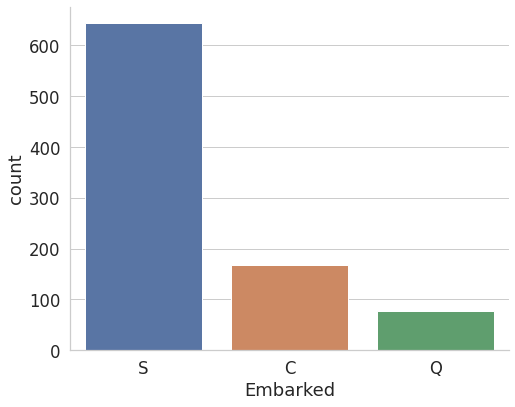

In [162]:
# gráfico contando o número de elementos que existem em cada classe
sns.set(font_scale=1.5, style = "whitegrid")
sns.catplot(x="Embarked", kind = "count", data = df_titanic, height = 6, aspect = 1.2)

In [163]:
df_titanic['Embarked'].mode()          # em Embarked, qual o termo que mais aparece?

0    S
dtype: object

In [164]:
# Substituindo os valores ausentes pelos termo que tem maior frequência ('S')
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [165]:
df_titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Análise de Outliers

In [166]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Olhando para as variáveis numéricas
* Age - já analisamos anteriormente (pada dados ausentes) e não há nenhum valor absurdo de idade)
* SibSp
* Parch
* Fare

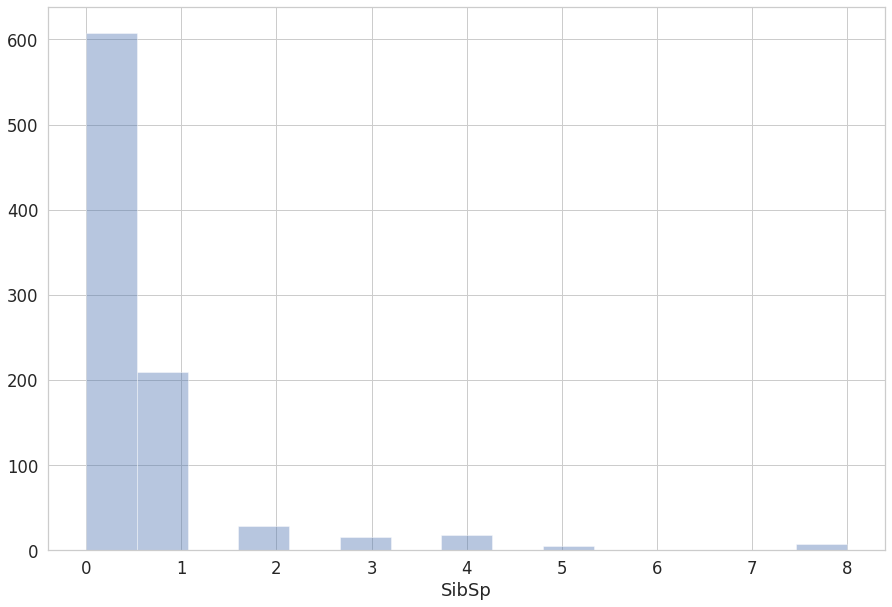

In [167]:
# SibSp
sns.set(font_scale=1.5, style = "whitegrid")
sns.distplot(df_titanic["SibSp"],kde= False, bins=15) 

Não tem nenhum valor absurdo em 'SibSp' - número de irmãos

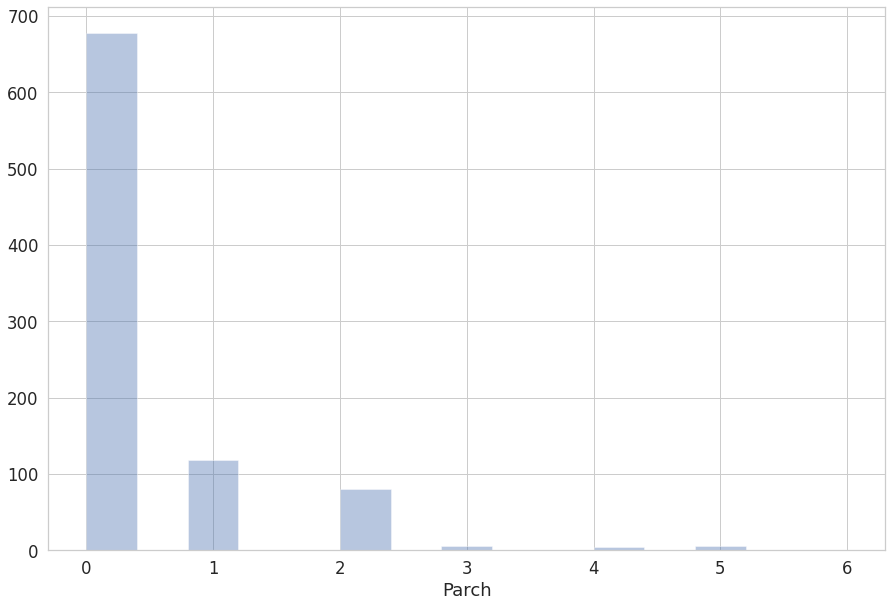

In [168]:
# Parch
sns.set(font_scale=1.5, style = "whitegrid")
sns.distplot(df_titanic["Parch"],kde= False, bins=15) 

Não tem nenhum valor absurdo em 'Parch'

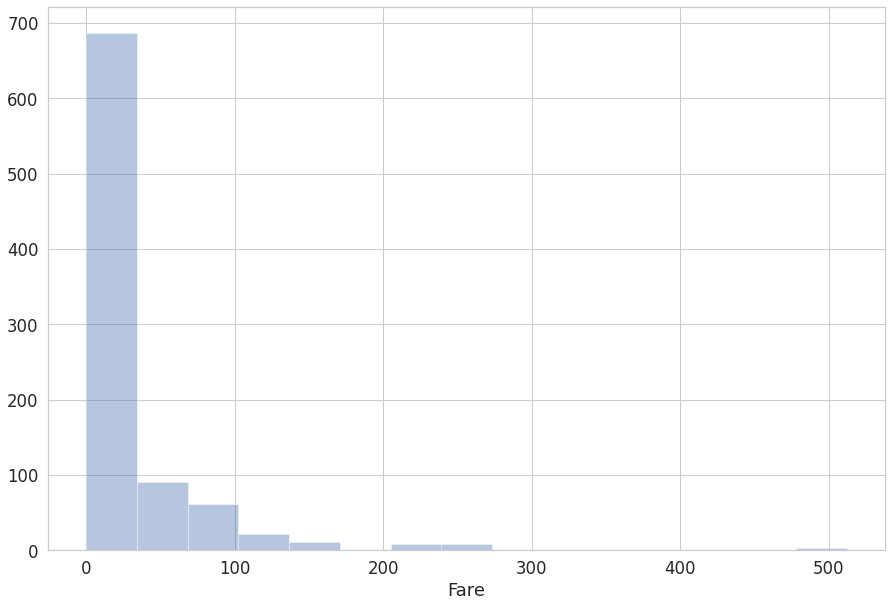

In [169]:
# Fare
sns.set(font_scale=1.5, style = "whitegrid")
sns.distplot(df_titanic["Fare"],kde= False, bins=15) 

Tem valores muito destoante dos demais (tem um de 500). Precisamos analisar com cuidado

In [171]:
df_titanic.loc[df_titanic['Fare'] > 300,:]             # selecionando as linhas em que a variável Fare é acima de 300

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [172]:
# Considerar registros apenas abaixo 300 -  Fare < 300
df_titanic1 = df_titanic.loc[df_titanic['Fare'] < 300,:]
print(df_titanic1.shape)
print(df_titanic.shape)

(888, 8)
(891, 8)


## Criando uma variável num_familiares

num_familiares = SibSp + Parch

In [173]:
df_titanic1['num_familiares'] = df_titanic1['SibSp'] + df_titanic1['Parch']  # soma das duas colunas
df_titanic1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,num_familiares
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [174]:
# Removendo as colunas SibSp e Parc
df_titanic1.drop(['SibSp', 'Parch'],axis= 1, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [176]:
df_titanic1

,Survived,Pclass,Sex,Age,Fare,Embarked,num_familiares
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,25.0,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


## Análise gráfica das variáveis


In [177]:
df_titanic1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,num_familiares
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


### Gráfico de dispersão

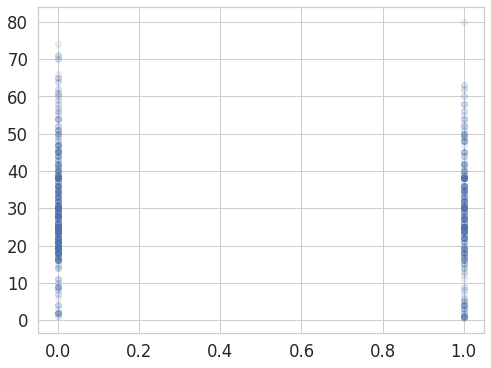

In [178]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df_titanic1['Survived'], df_titanic1['Age'], alpha=0.1)

### Gráfico de barras

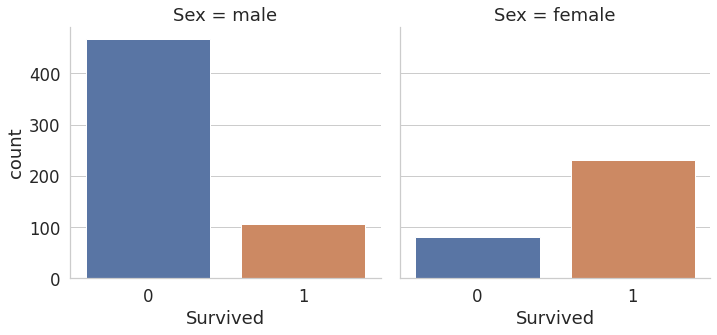

In [179]:
sns.catplot(x='Survived',col='Sex',kind='count',data=df_titanic1)

<font color="red"> Análise: Número de homens no total era muito maior que o número de mulheres. Mas mais mulhereses sobreviveram do que homens.

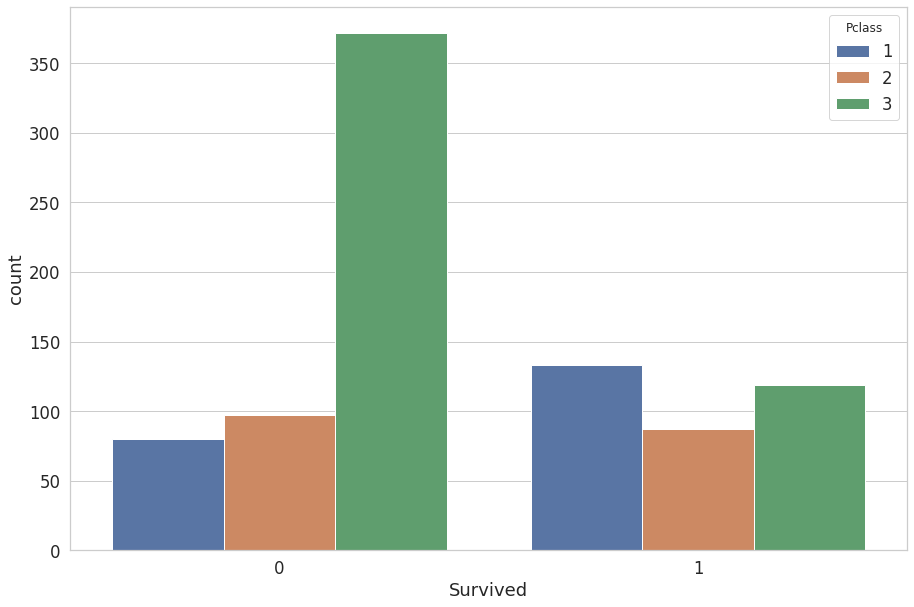

In [180]:
sns.countplot(x='Survived',hue='Pclass',data=df_titanic1)

<font color="red"> Análise: Número de pessoas da primeira classe foram as que mais sobreviveram. Classe 2 foi mais equilibrado sobreviventes e não sobreviventes, e Classe 3, a maior parte não sobreviveu.

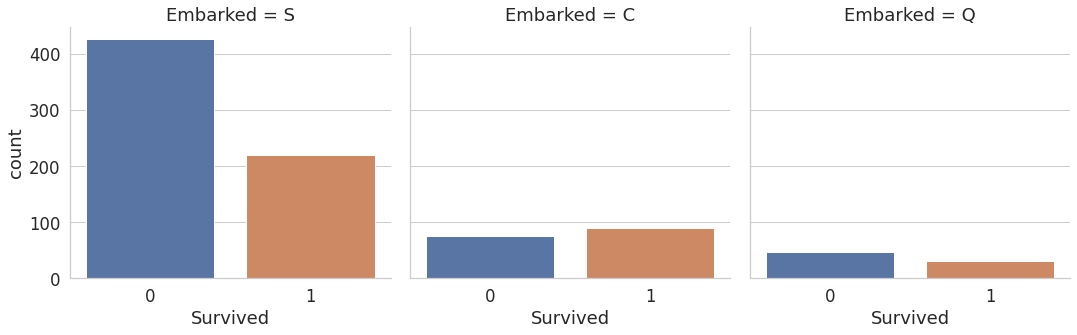

In [181]:
sns.catplot(x='Survived',col='Embarked',kind='count',data=df_titanic1)

### Histogramas 

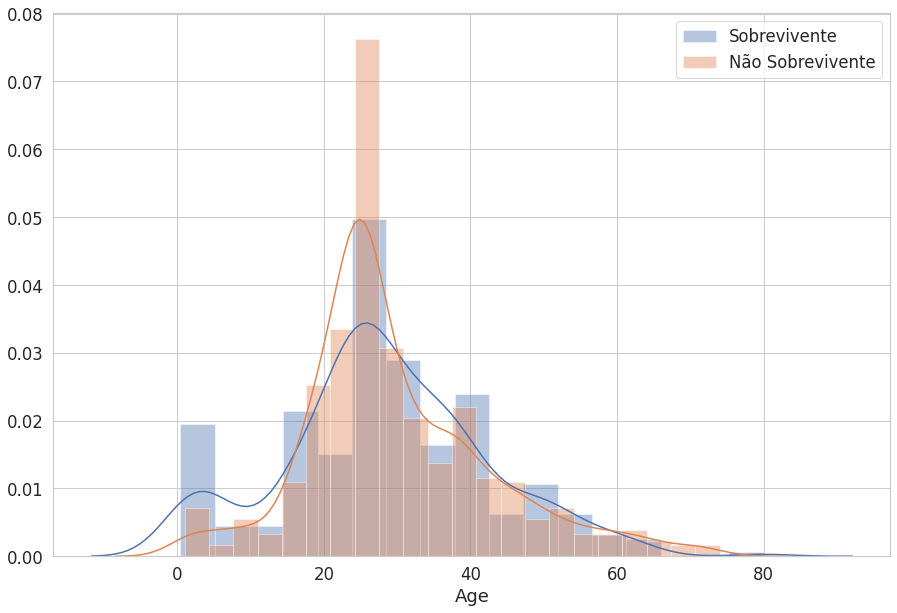

In [182]:
sns.distplot(df_titanic1.loc[df_titanic['Survived'] == 1,"Age"],label = "Sobrevivente")
sns.distplot(df_titanic1.loc[df_titanic['Survived'] == 0,"Age"],label = "Não Sobrevivente")
plt.legend()

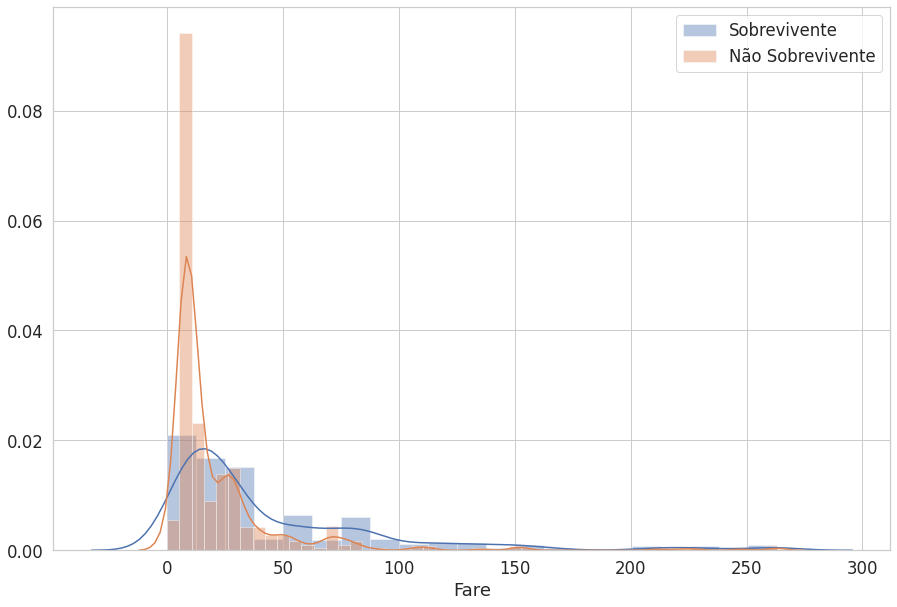

In [183]:
sns.distplot(df_titanic1.loc[df_titanic['Survived'] == 1,"Fare"],label = "Sobrevivente")
sns.distplot(df_titanic1.loc[df_titanic['Survived'] == 0,"Fare"],label = "Não Sobrevivente")
plt.legend()

### PairPlot

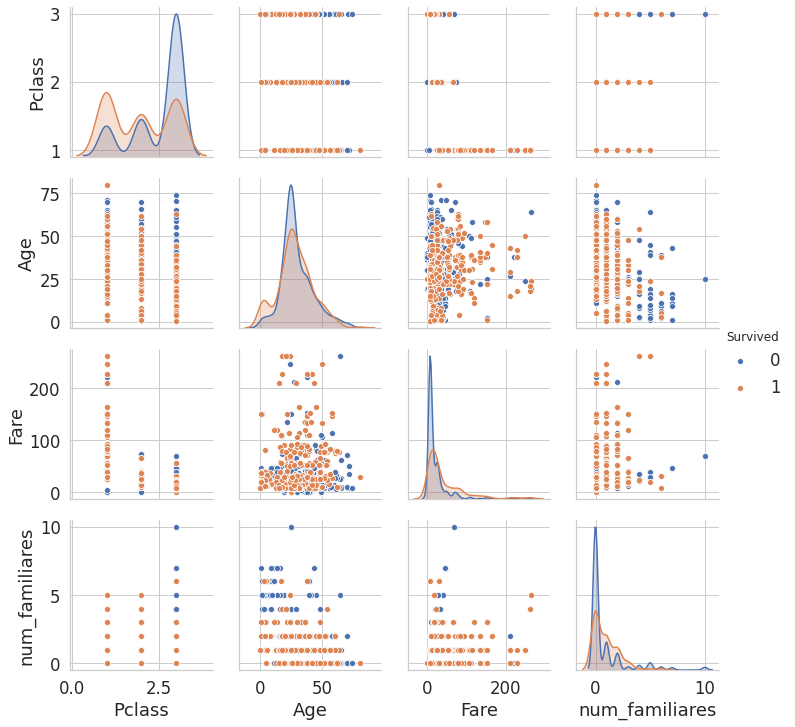

In [184]:
sns.set(font_scale=1.5,style="whitegrid")
sns.pairplot(df_titanic1, hue = 'Survived')  # utiliza as colunas numericas

## Transformando variáveis categóricas em números

As variáveis "Sex" e "Embarked" precisam ser transformadas para números. Mas precisamos nos lembrar que elas são categóricas, e **NÃO ORDENADAS**. Assim, precisamos transforma-la em colunas 0 e 1.

In [185]:
# SEX - Colunas categóricas -> numéricas
sex = pd.get_dummies(df_titanic1['Sex'], drop_first = True)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[888 rows x 1 columns]


In [186]:
# EMBARKED - Colunas categóricas -> numéricas
embark = pd.get_dummies(df_titanic1['Embarked'], drop_first = True)
print(embark)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[888 rows x 2 columns]


In [187]:
df_titanic1.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,num_familiares
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [188]:
df_titanic2 = pd.concat([df_titanic1,sex,embark], axis = 1)  # juntamos o dataset original com os datasets formados (sex e embarked)

In [189]:
df_titanic2.head()   # notar que as últimas colunas são exatamente as colunas criadas pelos dummies

,Survived,Pclass,Sex,Age,Fare,Embarked,num_familiares,male,Q,S
0,0,3,male,22.0,7.2500,S,1,1,0,1
1,1,1,female,38.0,71.2833,C,1,0,0,0
2,1,3,female,26.0,7.9250,S,0,0,0,1
3,1,1,female,35.0,53.1000,S,1,0,0,1
4,0,3,male,35.0,8.0500,S,0,1,0,1


In [190]:
df_titanic2.drop(['Sex', 'Embarked'], axis = 1, inplace = True)      # retirando as variáveis Sex e Embarked

In [191]:
df_titanic2.head()          # notar que Sex e Embarked foram removidos

,Survived,Pclass,Age,Fare,num_familiares,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [192]:
# Renomeando a coluna
df_titanic2.columns = ['Survived','Pclass','Age','Fare','num_familiares','Sex','Embarked_Q','Embarked_S']

In [193]:
df_titanic2.head()   

,Survived,Pclass,Age,Fare,num_familiares,Sex,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1
